In [30]:
import numpy as np
import matplotlib.pyplot as plt

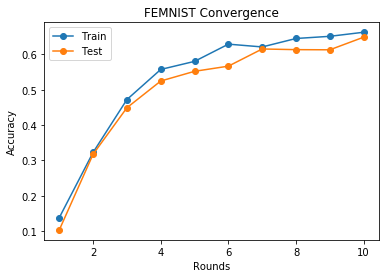

In [4]:
# svd_train_accuracies = [0.0942163, 0.32256, 0.461104, 0.544892, 0.582244]
# svd_test_accuracies = [0.0785127, 0.31313, 0.461178,  0.533197, 0.56859]

# full rank
svd_train_accuracies_full = [0.138588, 0.322955, 0.47214, 0.557138, 0.579983, 0.628616, 0.620728, 0.644605, 0.65075, 0.662249]
svd_test_accuracies = [0.103851, 0.317736, 0.449005, 0.524477, 0.551886, 0.566456, 0.614988, 0.613086,  0.612654, 0.648308]

#100-rank 
svd_train_accuracies_100 = [0.0539205, 0.0747245, 0.207245, 0.349931, 0.409138, 0.470209, 0.499412, 0.528098, 0.54781, 0.577126]
# svd_test_accuracies = [0.0613994, ]


rounds = np.arange(1, 11)
plt.plot(rounds, svd_train_accuracies_full, marker='o', label="Train")
plt.plot(rounds, svd_test_accuracies, marker='o', label="Test")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FEMNIST Convergence")
plt.legend()
plt.savefig('svd_full.png')


In [5]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# f = open("svd_experiments/400-rank-svd-80rds-eval1.txt", "r")
f = open("svd_experiments/repro-vb.txt", "r")

test_accuracies_10th = []
test_accuracies_mean = []
test_accuracies_90th = []

for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        test_accuracies_10th += [float(terms[4][:-1])]
        test_accuracies_mean += [float(terms[1][:-1])]
        test_accuracies_90th += [float(terms[-1])]
print(test_accuracies_10th)
print(test_accuracies_mean)
print(test_accuracies_90th)


step = 2

rounds = list(np.arange(1, 81, step))
# rounds.remove(20)
print(rounds)
print(len(test_accuracies_10th))
print(len(rounds))
axes = plt.gca()
axes.set_ylim([0,1])

plt.plot(rounds, test_accuracies_10th[::step], label="10th percentile")
plt.plot(rounds, test_accuracies_mean[::step], label="Mean")
plt.plot(rounds, test_accuracies_90th[::step], label="90th percentile")

plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FEMNIST Accuracy vs. Round Number")
plt.legend()
plt.savefig('400-rank.png')
        

FileNotFoundError: [Errno 2] No such file or directory: 'svd_experiments/repro-vb.txt'

<Figure size 640x480 with 0 Axes>

(0, 1)

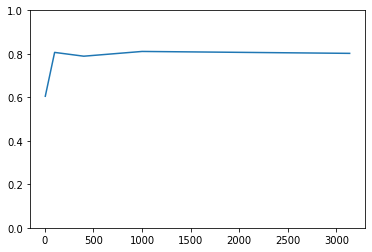

In [74]:
rank = [4, 100, 400, 1000, 3136]
mean_accuracy = [0.605006, 0.80664, 0.789192, 0.811059, 0.802238]
plt.plot(rank, mean_accuracy, label="10th percentile")
axes = plt.gca()
axes.set_ylim([0,1])

81
81
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
81
81


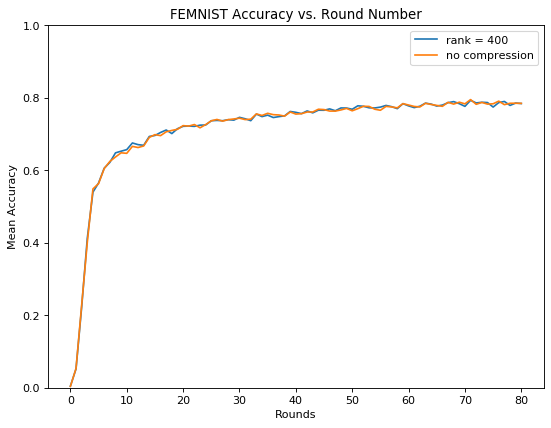

In [6]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
f = open("svd_experiments/femnist_SVD_400rank_80rds_2020-12-07-000944.txt", "r")
mean_test_accuracies_1000 = []

for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        mean_test_accuracies_1000 += [float(terms[1][:-1])]
# mean_test_accuracies_1000 = mean_test_accuracies_1000[1:]
print(len(mean_test_accuracies_1000))
f.close()
f = open("svd_experiments/fixed/nocomp-80rds-2.txt", "r")
mean_test_accuracies_nocomp = []


for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        mean_test_accuracies_nocomp += [float(terms[1][:-1])]
print(len(mean_test_accuracies_nocomp))


step = 1

rounds = list(np.arange(0, 81, step))
# rounds.remove(20)
print(rounds)
print(len(mean_test_accuracies_1000))
print(len(rounds))
axes = plt.gca()
axes.set_ylim([0,1])

plt.plot(rounds, mean_test_accuracies_1000[::step], label="rank = 400")
plt.plot(rounds, mean_test_accuracies_nocomp[::step], label="no compression")
# plt.plot(rounds, test_accuracies_90th[::step], label="90th percentile")

plt.xlabel("Rounds")
plt.ylabel("Mean Accuracy")
plt.title("FEMNIST Accuracy vs. Round Number")
plt.legend()
plt.savefig('compare.png')
        

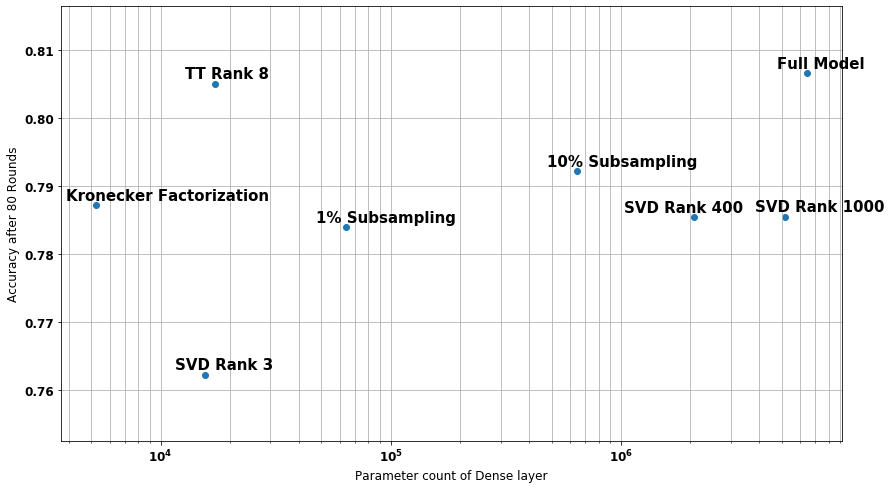

In [50]:
parameters = [6422528, 17152, 2074000, 5260, 5185000, 15555, 64226, 642253]
accuracy = [0.806642270941212,0.805087967573766,0.785492,0.78727221145235,0.785534,0.76231,0.78395,0.792212]
plt.figure(figsize=(14,8))
plt.scatter(parameters, accuracy)
plt.grid(True, which="both")
plt.xscale("log")
plt.xlabel("Parameter count of Dense layer")
plt.ylabel("Accuracy after 80 Rounds")
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# font = {'family' : 'normal',
#         'size'   : 12}

# plt.rc('font', **font)
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

labels = ["Full Model", "TT Rank 8", "SVD Rank 400", "Kronecker Factorization", "SVD Rank 1000", "SVD Rank 3", "1% Subsampling", "10% Subsampling"]
for i in range(len(parameters)):
    xytext=(-30,5)
    if i == 2:
        xytext=(-70, 5)
    plt.annotate(labels[i], (parameters[i], accuracy[i]), textcoords="offset points",  xytext=xytext, fontsize=15)
plt.savefig('compare.png')

    

[0.782332, 0.79066, 0.790142, 0.785018, 0.787391, 0.789068, 0.787659, 0.786311, 0.785774, 0.786252, 0.788218, 0.782833, 0.7501, 0.785035, 0.790317, 0.779287, 0.778893, 0.790734, 0.794173, 0.780866, 0.787253, 0.787728, 0.790087, 0.751638, 0.792068, 0.787328, 0.790564, 0.785378, 0.7937, 0.788083, 0.789717, 0.78917, 0.785414, 0.790037, 0.781715, 0.790367, 0.786333, 0.790881, 0.789849, 0.788078]
[311, 71, 391, 121, 301, 101, 191, 31, 181, 241, 361, 141, 1, 271, 151, 21, 81, 291, 331, 111, 51, 41, 171, 1, 371, 91, 351, 231, 61, 251, 221, 131, 201, 321, 11, 161, 211, 281, 381, 261]


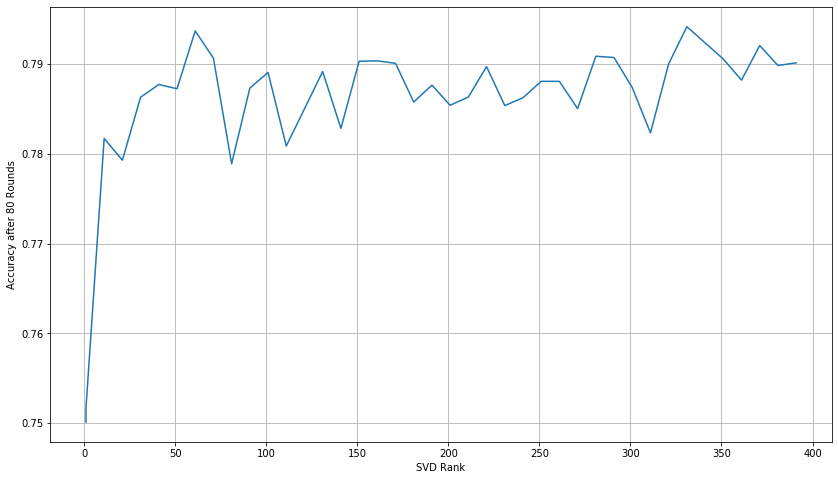

In [77]:
import glob, os
ranks = [str(i) for i in range(1,400,10)]
folder = "./svd_experiments"
files = []
for file in os.listdir(folder):
    if "rank" in file:
        files += [os.path.join(folder, file)]
filtered = []
for f in files:
    if any(ext+"rank" in f for ext in ranks):
        filtered += [f]
final_accuracies = []
final_ranks = []
for fname in filtered:
    f = open(fname, "r")
    mean_accuracies = []
    for x in f:
        if x.startswith("test_accuracy"):
            terms = x.split()
            mean_accuracies += [float(terms[1][:-1])]
    
    if len(mean_accuracies) == 81:
        final_accuracies += [mean_accuracies[-1]]
        rank = int(fname.split("_")[3][:-4])
        final_ranks += [rank]
    f.close()
print(final_accuracies)
print(final_ranks)
plt.figure(figsize=(14,8))

assert(len(final_accuracies) == len(final_ranks))
final_ranks, final_accuracies = zip(*sorted(zip(final_ranks, final_accuracies)))
plt.plot(final_ranks, final_accuracies)
plt.grid(True, which="both")
plt.xlabel("SVD Rank")
plt.ylabel("Accuracy after 80 Rounds")
plt.savefig('ranks.png')
